In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt

## Z-Score
- Strandard Score
### $\frac{\mathbf{x}-\bar x}{\sigma}$
- 이상탐지: threhold 보다 큰 값

In [2]:
# 데이터 준비
data = np.array([10, 25, 30, 5, 15, 20, 40, 35])
test = np.array([45, 39, 80, 99])
data, test

(array([10, 25, 30,  5, 15, 20, 40, 35]), array([45, 39, 80, 99]))

In [3]:
# 평균 계산
mean = np.mean(data)

# 표준편차 계산
std = np.std(data)

mean, std

(22.5, 11.4564392373896)

In [5]:
# Z-스코어 계산
zscores = (data - mean) / std

# 임계값 설정
threshold = 3

# 이상값 탐지
anomalies = data[np.abs(zscores) > threshold]
anomalies_test = test[np.abs((test-mean)/std) > threshold]

# 결과 출력
print("평균:", mean)
print("표준편차:", std)
print("Z-스코어:", zscores)
print("Test Z-스코어:", (test-mean)/std)
print("이상값:", anomalies)
print("이상값:", anomalies_test)

평균: 22.5
표준편차: 11.4564392373896
Z-스코어: [-1.09108945  0.21821789  0.65465367 -1.52752523 -0.65465367 -0.21821789
  1.52752523  1.09108945]
Test Z-스코어: [1.96396101 1.44023808 5.01901148 6.67746744]
이상값: []
이상값: [80 99]


## IQR

In [6]:
# 데이터 준비
data = np.array([10, 25, 30, 5, 15, 20, 40, 35, 28, 42, 18, 22])
test = np.array([-10, 45, 39, 54, 59])

In [7]:
# 1사분위수 (Q1) 계산
Q1 = np.percentile(data, 25)

# 3사분위수 (Q3) 계산
Q3 = np.percentile(data, 75)

# IQR 계산
IQR = Q3 - Q1

# 이상값 범위 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상값 탐지
anomalies = data[(data < lower_bound) | (data > upper_bound)]
anomalies_test = test[(test < lower_bound) | (test > upper_bound)]

# 결과 출력
print("1사분위수:", Q1)
print("3사분위수:", Q3)
print("IQR:", IQR)
print("이상값 범위:", lower_bound, "~", upper_bound)
print("이상값:", anomalies)
print("이상값:", anomalies_test)

1사분위수: 17.25
3사분위수: 31.25
IQR: 14.0
이상값 범위: -3.75 ~ 52.25
이상값: []
이상값: [-10  54  59]


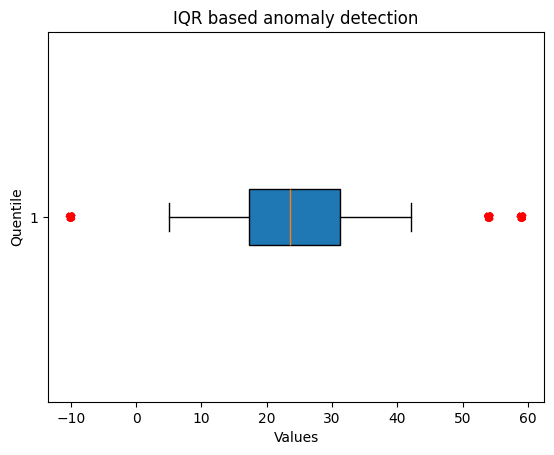

In [8]:
# 박스 플롯 생성
plt.boxplot(data, vert=False, patch_artist=True)

# 이상값 표시
for anomaly in anomalies_test:
    plt.scatter(anomalies_test, [1 for _ in range(len(anomalies_test))], color='r', linestyle='dashed', linewidth=1)

# 축 라벨 설정
plt.xlabel('Values')
plt.ylabel('Quentile')

# 제목 설정
plt.title('IQR based anomaly detection')

# 그래프 출력
plt.show()